In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os import listdir
from os.path import join

plt.xkcd()

In [2]:
def find_sum_of_values(df, aggregator, value):
    '''
    Return a dataframe with the statistics of values from "value" property
    aggregated by unique values from the column "aggregator"

    :params df: pandas dataframe to be sliced
    :params aggregator: dataframe column that will be
                        filtered by unique values
    :params value: dataframe column containing values to be summed
    :return: dataframe containing (for each aggregator unit):
        * property sum
        * property mean value
        * property max value
        * property mean value
        * number of occurences in total
    '''

    total_label = '{}_total'.format(value)
    max_label = '{}_max'.format(value)
    mean_label = '{}_mean'.format(value)
    min_label = '{}_min'.format(value)

    result = {
        'occurences': [],
        aggregator: df[aggregator].unique(),
        max_label: [],
        mean_label: [],
        min_label: [],
        total_label: [],
    }

    for item in result[aggregator]:
        if isinstance(df[aggregator].iloc[0], str):
            item = str(item)
        data = df[df[aggregator] == item]
        property_total = float(data[value].sum())
        occurences = float(data[value].count())

        result[total_label].append(property_total)
        result['occurences'].append(occurences)
        if occurences > 0:
            result[mean_label].append(property_total/occurences)
        else:
            result[mean_label].append(0)
        result[max_label].append(np.max(data[value]))
        result[min_label].append(np.min(data[value]))

    return pd.DataFrame(result).sort_values(by=aggregator)


def find_sum_of_values_per_period(df, aggregator, period_aggregator, value):
    '''
    Return a dataframe with a matrix containing unique values of
    dataframe column "aggregator" and dataframe column "period_aggregator".
    The values added are the sum of the "value" column.

    :params df: pandas dataframe to be sliced
    :params aggregator: dataframe column that will be
                        filtered by unique values
    :params period_ggregator: dataframe column that will be
                              filtered by unique values and compared with
                              aggregator column
    :params value: dataframe column containing values to be summed
    :return: dataframe containing aggregator vs period_aggregator with
             the sum of "value".
    '''

    periods = df[period_aggregator].unique() #1,2,3,4...

    result = {
        aggregator: df[aggregator].unique(), #fulano, ciclano...
    }

    for period in periods:
        result[period] = []

    for item in result[aggregator]:
        data = df[df[aggregator]==item]
        for period in periods:
            data_per_period = data[data[period_aggregator]==period]
            result[period].append(data_per_period[value].sum())
    return pd.DataFrame(result).sort_values(by=aggregator)

In [3]:
data = pd.read_csv('../data/2016-11-22-reimbursements.xz',
                      dtype={'document_id': np.str,
                          'congressperson_id': np.str,
                          'congressperson_document': np.str,
                          'term_id': np.str,
                          'cnpj_cpf': np.str,
                          'reimbursement_number': np.str},
                      low_memory=False)

In [4]:
meals = data[data['subquota_description']=='Congressperson meal']
meals.head()

,year,applicant_id,document_id,reimbursement_value_total,total_net_value,reimbursement_numbers,congressperson_name,congressperson_id,congressperson_document,term,...,issue_date,document_value,remark_value,net_values,month,installment,passenger,leg_of_the_trip,batch_number,reimbursement_values
19,2011,1001,2001564,NaN,12.40,3547,DILCEU SPERAFICO,73768,444,2015.0,...,2011-01-30T00:00:00,12.40,0.0,12.40,1,0,NaN,NaN,517399,NaN
52,2011,1001,2007770,NaN,155.10,3552,DILCEU SPERAFICO,73768,444,2015.0,...,2011-02-13T00:00:00,155.10,0.0,155.10,2,0,NaN,NaN,519351,NaN
53,2011,1001,2007777,NaN,50.00,3552,DILCEU SPERAFICO,73768,444,2015.0,...,2011-02-12T00:00:00,50.00,0.0,50.00,2,0,NaN,NaN,519351,NaN
54,2011,1001,2007782,NaN,94.05,3552,DILCEU SPERAFICO,73768,444,2015.0,...,2011-02-13T00:00:00,94.05,0.0,94.05,2,0,NaN,NaN,519351,NaN
84,2011,1001,2015052,NaN,214.28,3575,DILCEU SPERAFICO,73768,444,2015.0,...,2011-02-23T00:00:00,214.28,0.0,214.28,2,0,NaN,NaN,521396,NaN


In [5]:
infos = {}

infos['total_spent'] = meals['total_net_value'].sum()
infos['initial_year'] = int(np.min(meals['year']))
infos['last_year'] = int(np.max(meals['year']))
infos

{'initial_year': 2011, 'last_year': 2016, 'total_spent': 9856580.170000935}

# Total value spent of meals during all data records

Following data and graphs considers all expenditues since the initial record until the last data record.


/home/ana/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


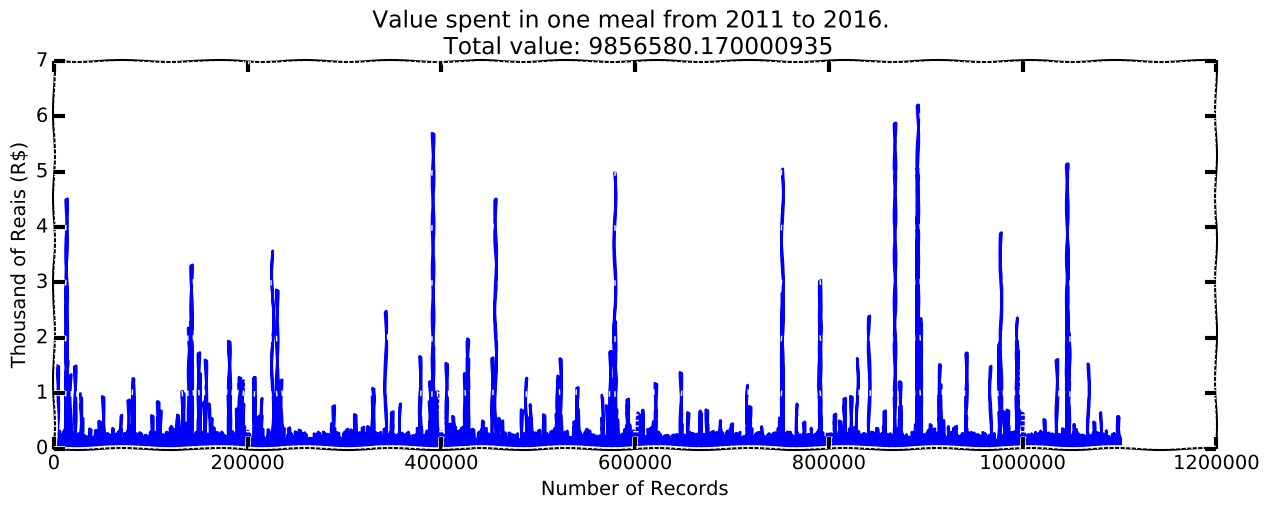

In [6]:
plt.figure(figsize=(15,5))
plt.plot(meals['total_net_value']/1000)
plt.title('Value spent in one meal from {} to {}. \n Total value: {}'. format(infos['initial_year'],
                                                                              infos['last_year'],
                                                                              infos['total_spent']))
plt.ylabel('Thousand of Reais (R$)')
plt.xlabel('Number of Records')
plt.grid()

#  List of total expenditures on meals by congress person


Attention! Ids can be nan from party expenses!

You can't use ids to get unique values

In [7]:
sum_per_person = find_sum_of_values(meals, 'congressperson_name', 'total_net_value')

if (sum_per_person['total_net_value_total'].sum() - infos['total_spent']) == 0:
    print('Values are ok!')

In [8]:
infos['mean_value_spent'] = np.mean(sum_per_person['total_net_value_total'])
infos['max_value_spent'] = np.max(sum_per_person['total_net_value_total'])
infos['min_value_spent'] = np.min(sum_per_person['total_net_value_total'])
infos['min_value_spent_by'] = sum_per_person['congressperson_name'][sum_per_person['total_net_value_total'] == infos['min_value_spent']]
infos['max_value_spent_by'] = sum_per_person['congressperson_name'][sum_per_person['total_net_value_total'] == infos['max_value_spent']]

print('Mean value spent on meals: {}'.format(infos['mean_value_spent']))
print('Max value spent on meals: {}'.format(infos['max_value_spent']))
print('Max value spent on meals by: {}'.format(infos['max_value_spent_by']))
print('---')
print('Min value spent on meals: {}'.format(infos['min_value_spent']))
print('Min value spent on meals by: {}'.format(infos['min_value_spent_by']))

Mean value spent on meals: 11832.629255702286
Max value spent on meals: 196247.97000000006
Max value spent on meals by: 435    LIDERANÇA DO PSDB
Name: congressperson_name, dtype: object
---
Min value spent on meals: 15.219999999999999
Min value spent on meals by: 249    ITAMAR ROCHA
Name: congressperson_name, dtype: object


# Top ten most expensive congress person

In [9]:
sum_per_person.sort_values(by='total_net_value_total', ascending=False)[0:10]

,congressperson_name,occurences,total_net_value_max,total_net_value_mean,total_net_value_min,total_net_value_total
435,LIDERANÇA DO PSDB,260.0,4990.00,754.799885,11.00,196247.97
270,ROGÉRIO PENINHA MENDONÇA,1726.0,377.00,99.988384,6.30,172579.95
27,ROBERTO FREIRE,1842.0,277.30,89.679701,3.00,165190.01
517,LIDERANÇA DO PT,405.0,6205.00,404.816173,2.90,163950.55
143,DR. ADILSON SOARES,2727.0,241.89,51.877946,2.50,141471.16
290,FRANCISCO FLORIANO,2136.0,278.25,59.691760,1.75,127501.60
208,VANDERLEI MACRIS,2936.0,210.00,40.541069,1.55,119028.58
361,EDSON PIMENTA,913.0,310.00,123.149726,13.96,112435.70
130,ANTONIO BULHÕES,1089.0,234.00,96.270239,10.48,104838.29
338,MARLLOS SAMPAIO,730.0,5880.00,138.968562,2.00,101447.05


/home/ana/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


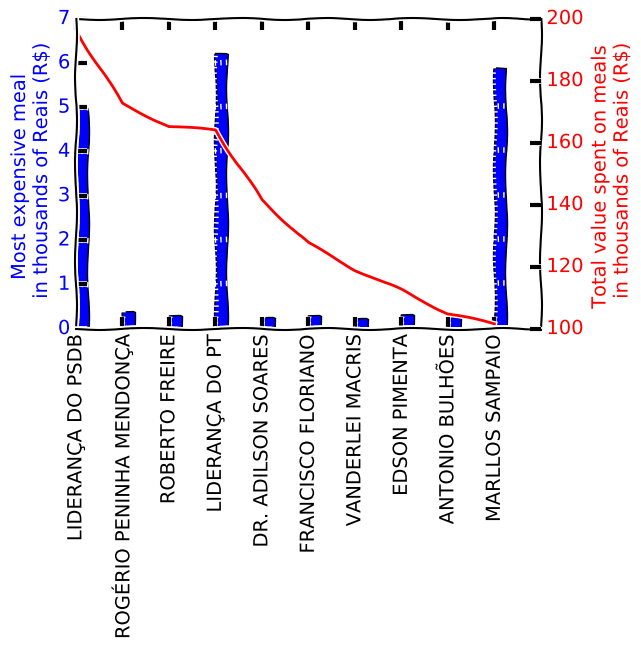

In [10]:
first_ten = sum_per_person.sort_values(by='total_net_value_total', ascending=False)[0:10]

major_ticks = first_ten['congressperson_name']


fig, ax1 = plt.subplots()
fig.set_figheight = 5

ax1.bar(range(10), first_ten['total_net_value_max']/1000, 0.25)
ax1.set_ylabel('Most expensive meal \n in thousands of Reais (R$)', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
   
ax2 = ax1.twinx()
ax2.set_ylabel('Total value spent on meals \n in thousands of Reais (R$)', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
ax2.plot(range(10), first_ten['total_net_value_total']/1000,'r')

ax1.set_xticks(range(10))
ax1.set_xticklabels(first_ten['congressperson_name'], rotation='vertical')
ax1.grid()

#  List of expenditures on meals by month considereing all data records

In [11]:
sum_by_month = find_sum_of_values(meals, 'month', 'total_net_value')

sum_by_month

,month,occurences,total_net_value_max,total_net_value_mean,total_net_value_min,total_net_value_total
0,1,6655.0,5880.00,73.229052,1.50,487339.34
1,2,12898.0,3569.50,65.361693,1.50,843035.12
2,3,16841.0,5142.25,63.628150,1.19,1071561.68
8,4,16238.0,3687.50,65.391029,0.73,1061819.53
3,5,17469.0,4507.00,65.121677,1.40,1137610.57
9,6,14998.0,3617.41,64.643483,1.00,969522.96
10,7,11830.0,3887.00,66.253730,1.50,783781.63
11,8,12326.0,5696.00,63.494154,1.00,782628.94
4,9,10890.0,3900.00,64.257478,1.00,699763.94
5,10,11423.0,5054.99,65.730264,1.49,750836.80


/home/ana/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


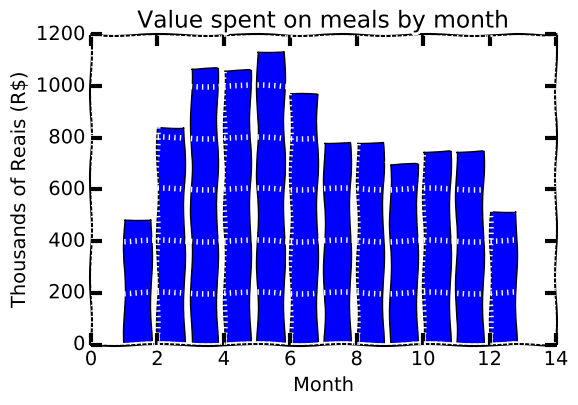

In [12]:
plt.bar(sum_by_month['month'], sum_by_month['total_net_value_total']/1000)
plt.title('Value spent on meals by month')
plt.ylabel('Thousands of Reais (R$)')
plt.xlabel('Month')
plt.grid()


# Top ten most expensive parties

In [13]:
sum_per_party = find_sum_of_values(meals, 'party', 'total_net_value')

sum_per_party.sort_values(by='total_net_value_total', ascending=False)[0:10]

,occurences,party,total_net_value_max,total_net_value_mean,total_net_value_min,total_net_value_total
2,20390.0,PMDB,5880.00,71.805349,1.80,1464111.07
5,20263.0,PT,1374.79,54.055591,1.00,1095328.44
0,13038.0,PP,4507.00,57.969801,1.49,755810.26
7,12833.0,PR,911.22,58.375108,1.50,749127.76
6,9846.0,PSD,2865.30,74.968661,1.20,738141.44
3,14625.0,PSDB,3316.50,49.039605,1.40,717204.23
10,12688.0,PSB,3900.00,54.425564,1.50,690551.56
9,9283.0,DEM,807.59,70.773286,0.01,656988.41
11,5973.0,PPS,1610.57,74.089538,1.50,442536.81
14,4746.0,PRB,1540.00,75.590198,1.72,358751.08


/home/ana/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


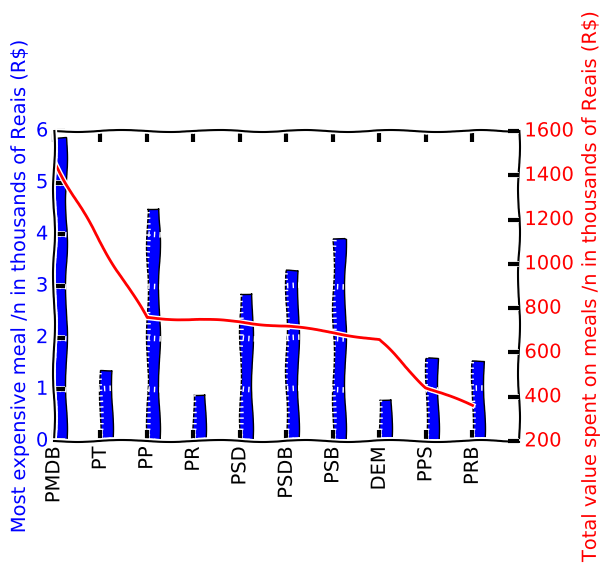

In [14]:
first_ten = sum_per_party.sort_values(by='total_net_value_total', ascending=False)[0:10]

major_ticks = first_ten['party']

fig, ax1 = plt.subplots()

ax1.bar(range(10), first_ten['total_net_value_max']/1000, 0.25)
ax1.set_ylabel('Most expensive meal /n in thousands of Reais (R$)', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
   
ax2 = ax1.twinx()
ax2.set_ylabel('Total value spent on meals /n in thousands of Reais (R$)', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
ax2.plot(range(10), first_ten['total_net_value_total']/1000,'r')

ax1.set_xticks(range(10))
ax1.set_xticklabels(first_ten['party'], rotation='vertical')
ax1.grid()

# Data per year

In [15]:
data_per_year = {}
for year in meals['year'].unique():
    data = meals[meals['year']==year]
    data_per_year[year] = {
        'data': data,
        'sum_per_parties': find_sum_of_values(data, 'party', 'total_net_value'),
        'sum_per_congressperson': find_sum_of_values(data, 'congressperson_name', 'total_net_value'),
        'congressperson_per_month': find_sum_of_values_per_period(data, 'congressperson_name', 'month', 'total_net_value'),
        'parties_per_month': find_sum_of_values_per_period(data, 'party', 'month', 'total_net_value'),
    }



In [16]:
def find_most_expensive_monthly_expenditures(yearly_data, num=10):              
    sum_per_person = yearly_data['sum_per_congressperson']                      
    person_per_month = yearly_data['congressperson_per_month']                  
    most_expensive = sum_per_person.sort_values(by='total_net_value_total',           
                                                ascending=False)[0:num]         
    most_expensive_by_month = []                                                
    for name in most_expensive['congressperson_name']:                          
        most_expensive_by_month.append(                                         
            person_per_month[person_per_month['congressperson_name']==name]     
        )                                                                       
    return pd.concat(most_expensive_by_month)

In [17]:
MONTHS = ['JAN', 'FEV', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AGO', 'SET', 'OCT', 'NOV', 'DEZ']
months = range(0, 12)

# TEN MOST EXPENSIVE CONGRESS PERSON 2015

/home/ana/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


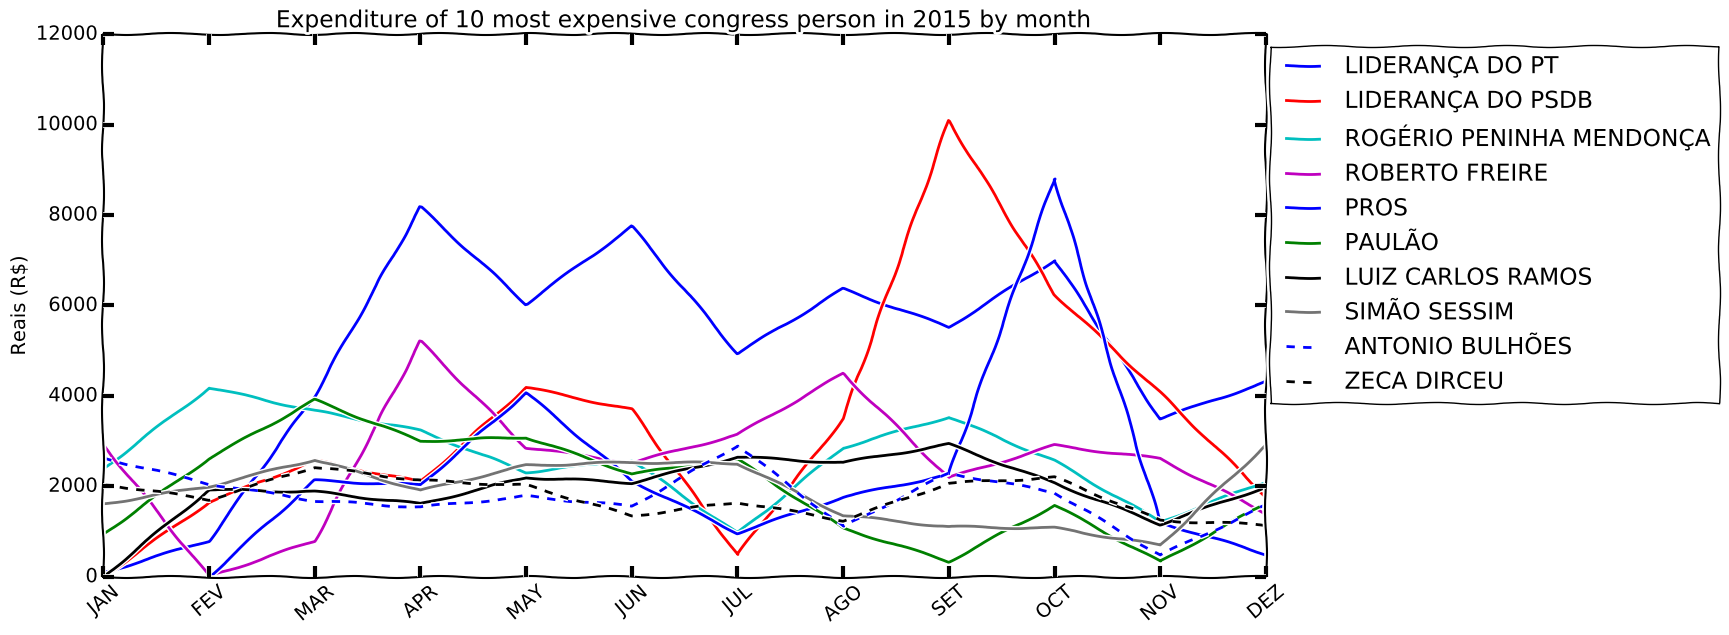

In [18]:
YEAR = 2015
data = data_per_year[YEAR]
most_expensives = find_most_expensive_monthly_expenditures(data)
mm = most_expensives.set_index('congressperson_name').transpose()
index = [key for key in mm.keys()]

f = plt.figure(figsize=(15, 7))
plt.plot(months, mm[index[0]])
plt.plot(months, mm[index[1]])
plt.plot(months, mm[index[2]])
plt.plot(months, mm[index[3]])
plt.plot(months, mm[index[4]])
plt.plot(months, mm[index[5]], 'g')
plt.plot(months, mm[index[6]], 'k')
plt.plot(months, mm[index[7]], '0.45')
plt.plot(months, mm[index[8]], '--b')
plt.plot(months, mm[index[9]], '--k')
plt.xlim(0, 11)
plt.title('Expenditure of 10 most expensive congress person in {} by month'.format(YEAR))
plt.ylabel('Reais (R$)')
plt.legend(index, bbox_to_anchor=(1.4, 1))
ax1 = f.get_axes()[0]
ax1.set_xticks(range(12))
ax1.set_xticklabels(MONTHS, rotation=40)

# TEN MOST EXPENSIVE CONGRESS PERSON 2014

/home/ana/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


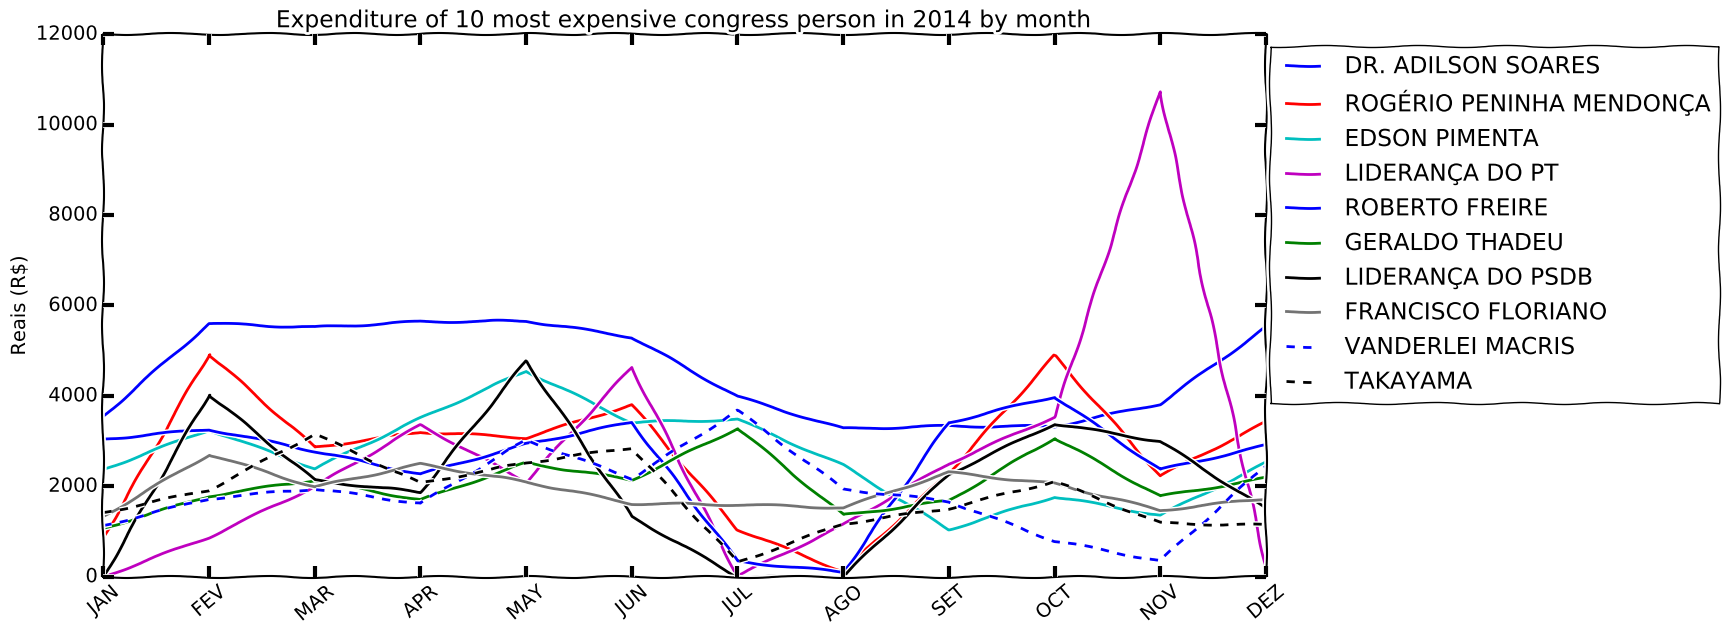

In [19]:
YEAR = 2014
data = data_per_year[YEAR]
most_expensives = find_most_expensive_monthly_expenditures(data)
mm = most_expensives.set_index('congressperson_name').transpose()
index = [key for key in mm.keys()]

f = plt.figure(figsize=(15, 7))
plt.plot(months, mm[index[0]])
plt.plot(months, mm[index[1]])
plt.plot(months, mm[index[2]])
plt.plot(months, mm[index[3]])
plt.plot(months, mm[index[4]])
plt.plot(months, mm[index[5]], 'g')
plt.plot(months, mm[index[6]], 'k')
plt.plot(months, mm[index[7]], '0.45')
plt.plot(months, mm[index[8]], '--b')
plt.plot(months, mm[index[9]], '--k')
plt.xlim(0, 11)
plt.title('Expenditure of 10 most expensive congress person in {} by month'.format(YEAR))
plt.ylabel('Reais (R$)')
plt.legend(index, bbox_to_anchor=(1.4, 1))
ax1 = f.get_axes()[0]
ax1.set_xticks(range(12))
ax1.set_xticklabels(MONTHS, rotation=40)

# TEN MOST EXPENSIVE CONGRESS PERSON 2013

/home/ana/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


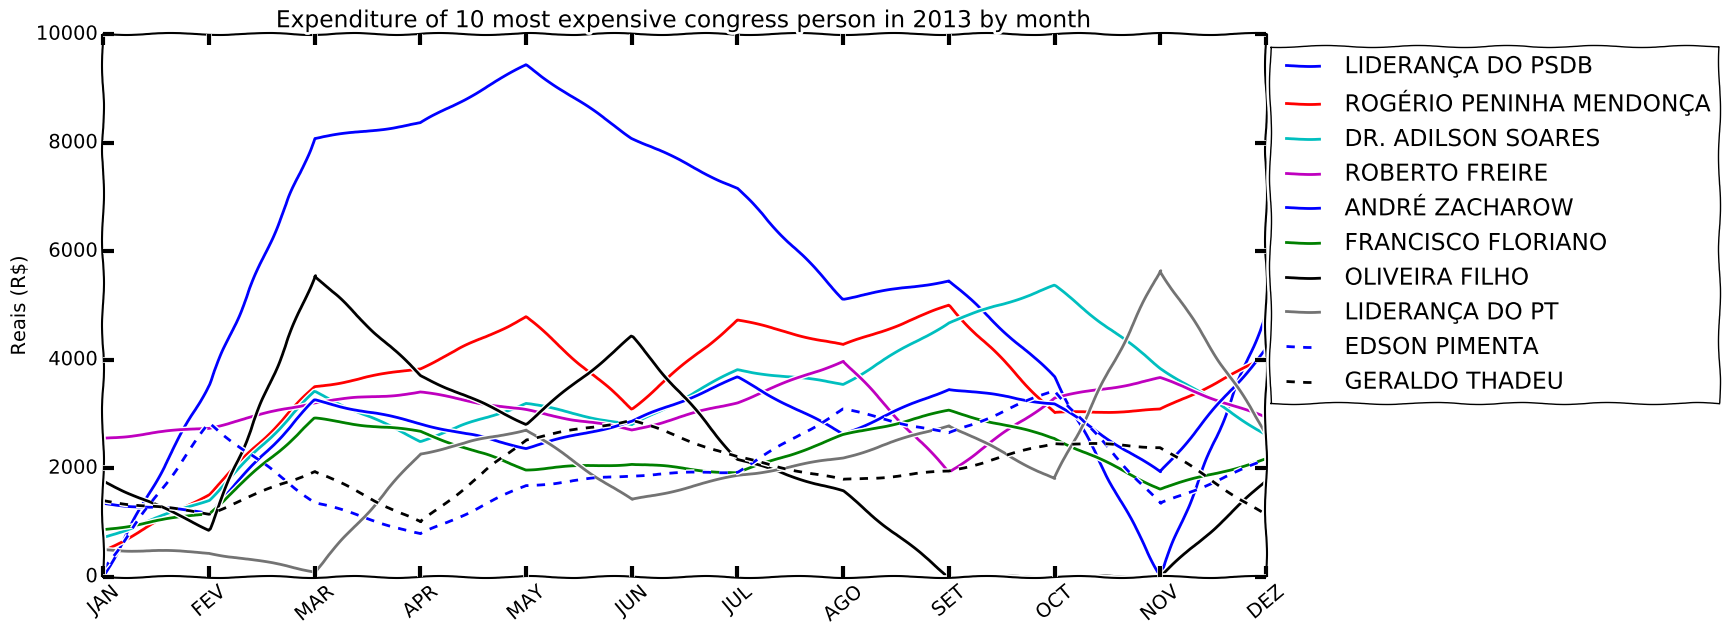

In [20]:
YEAR = 2013
data = data_per_year[YEAR]
most_expensives = find_most_expensive_monthly_expenditures(data)
mm = most_expensives.set_index('congressperson_name').transpose()
index = [key for key in mm.keys()]

f = plt.figure(figsize=(15, 7))
plt.plot(months, mm[index[0]])
plt.plot(months, mm[index[1]])
plt.plot(months, mm[index[2]])
plt.plot(months, mm[index[3]])
plt.plot(months, mm[index[4]])
plt.plot(months, mm[index[5]], 'g')
plt.plot(months, mm[index[6]], 'k')
plt.plot(months, mm[index[7]], '0.45')
plt.plot(months, mm[index[8]], '--b')
plt.plot(months, mm[index[9]], '--k')
plt.xlim(0, 11)
plt.title('Expenditure of 10 most expensive congress person in {} by month'.format(YEAR))
plt.ylabel('Reais (R$)')
plt.legend(index, bbox_to_anchor=(1.4, 1))
ax1 = f.get_axes()[0]
ax1.set_xticks(range(12))
ax1.set_xticklabels(MONTHS, rotation=40)

# TEN MOST EXPENSIVE CONGRESS PERSON 2012

/home/ana/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


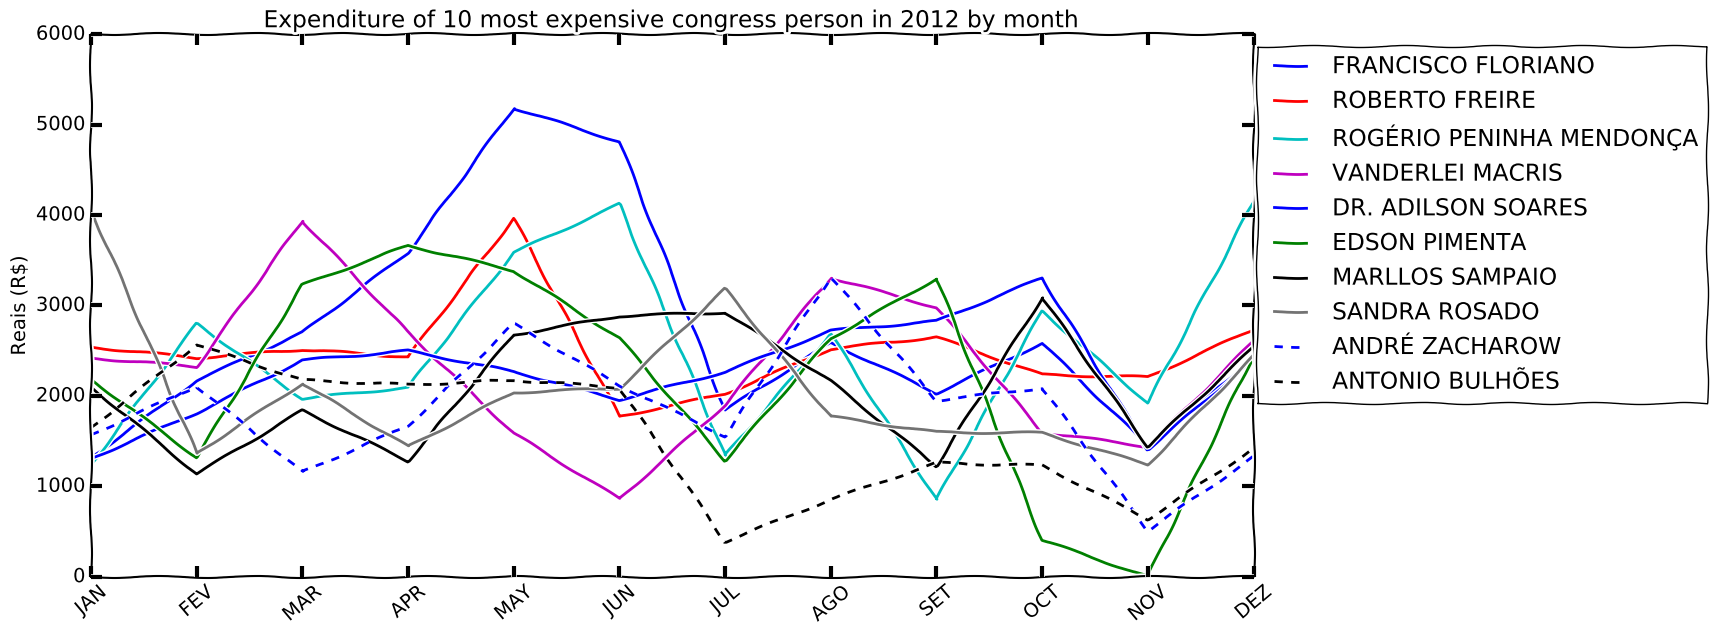

In [21]:
YEAR = 2012
data = data_per_year[YEAR]
most_expensives = find_most_expensive_monthly_expenditures(data)
mm = most_expensives.set_index('congressperson_name').transpose()
index = [key for key in mm.keys()]

f = plt.figure(figsize=(15, 7))
plt.plot(months, mm[index[0]])
plt.plot(months, mm[index[1]])
plt.plot(months, mm[index[2]])
plt.plot(months, mm[index[3]])
plt.plot(months, mm[index[4]])
plt.plot(months, mm[index[5]], 'g')
plt.plot(months, mm[index[6]], 'k')
plt.plot(months, mm[index[7]], '0.45')
plt.plot(months, mm[index[8]], '--b')
plt.plot(months, mm[index[9]], '--k')
plt.xlim(0, 11)
plt.title('Expenditure of 10 most expensive congress person in {} by month'.format(YEAR))
plt.ylabel('Reais (R$)')
plt.legend(index, bbox_to_anchor=(1.4, 1))
ax1 = f.get_axes()[0]
ax1.set_xticks(range(12))
ax1.set_xticklabels(MONTHS, rotation=40)

# TEN MOST EXPENSIVE CONGRESS PERSON 2011

/home/ana/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


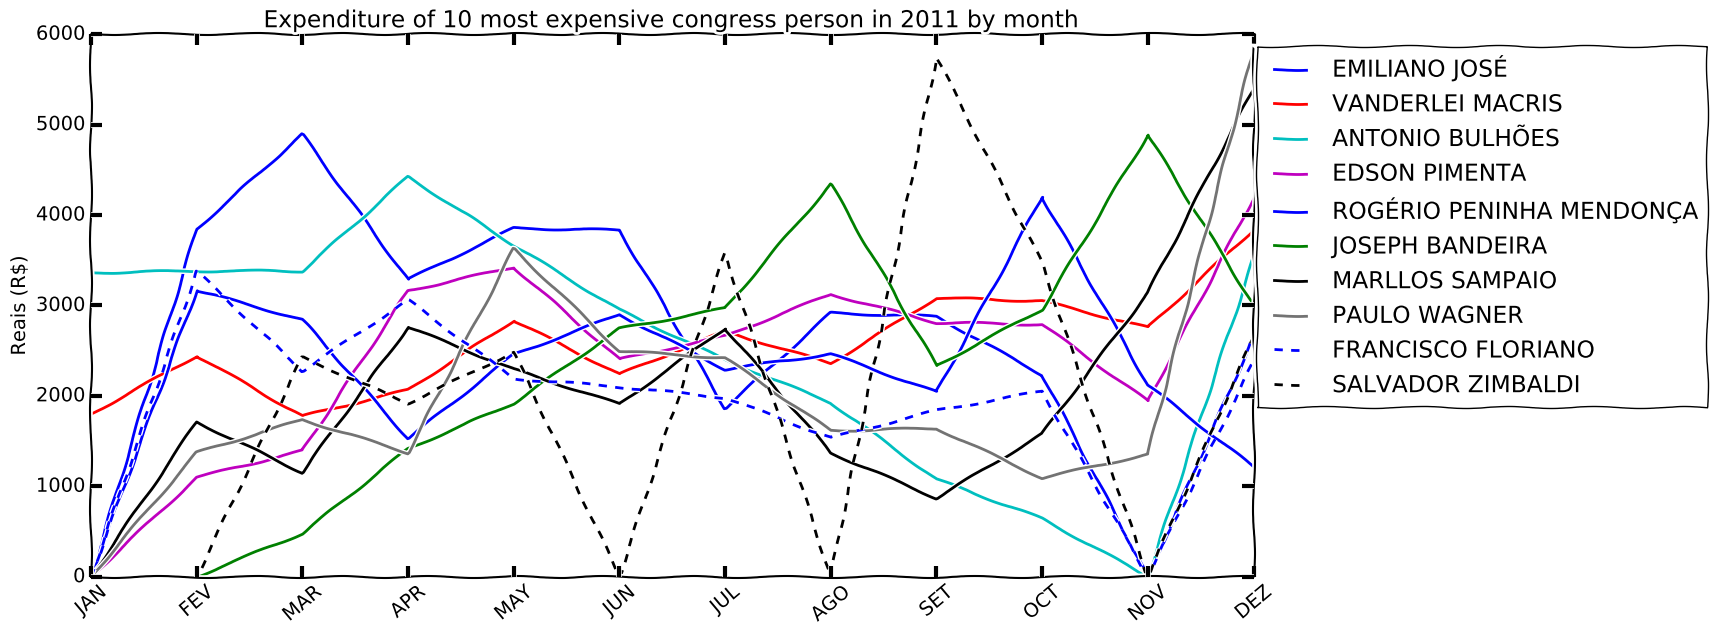

In [22]:
YEAR = 2011
data = data_per_year[YEAR]
most_expensives = find_most_expensive_monthly_expenditures(data)
mm = most_expensives.set_index('congressperson_name').transpose()
index = [key for key in mm.keys()]

f = plt.figure(figsize=(15, 7))
plt.plot(months, mm[index[0]])
plt.plot(months, mm[index[1]])
plt.plot(months, mm[index[2]])
plt.plot(months, mm[index[3]])
plt.plot(months, mm[index[4]])
plt.plot(months, mm[index[5]], 'g')
plt.plot(months, mm[index[6]], 'k')
plt.plot(months, mm[index[7]], '0.45')
plt.plot(months, mm[index[8]], '--b')
plt.plot(months, mm[index[9]], '--k')
plt.xlim(0, 11)
plt.title('Expenditure of 10 most expensive congress person in {} by month'.format(YEAR))
plt.ylabel('Reais (R$)')
plt.legend(index, bbox_to_anchor=(1.4, 1))
ax1 = f.get_axes()[0]
ax1.set_xticks(range(12))
ax1.set_xticklabels(MONTHS, rotation=40)